## <div style="text-align: center;"> Application of Benford's Law for Fraud Detection (v 1.0)

### <div style="text-align: center;"> USING PYTHON PROGRAMMING LANGUAGE  </div>

Benford's Law or the law of anomalous numbers, or the first-digit law is used to detect anomalous amounts in credit card transactions dataset and payments datasets, which were downloaded from Kaggle.

Prepared by Imir Osmanov. Date: 04.10.2024.

### <div style="text-align: center;"> EXECUTIVE SUMMARY </div>

### Purpose:
The purpose of this exercise is to apply Benford's Law to datasets on credit card transactions and payment transactions, which were downloaded from Kaggle, to detect anomalous amounts.

### Main findings:
2 datasets with identified and labeled fraud transactions were analyzed by applying Benford's Law to the first and second digits of transactions/payments amounts. These tests for first and second digits are used to assess overal conformity and detect obvious anomalies. Despite identified differences between expected distributions of numbers as per Benford's Law and actual distributions of numbers from transactions/payments amounts, the statistical tests like Chi-Squared test and the Kolmogorov-Smirnov (K-S) test shown that there is no significant evidences to suggest that the observed distribution differs from what is expected under Benford's Law as p-values of the test were above alpha (0.05) and we failed to reject the Null Hypothesis.
Also calculations of Z-statistics for both datasets do not revealed statistical significant differences in both distributions and confirmed conformity with Benford's Lawn(Z-statistics less than 1.96 (alpha = 0.05).

Deviations of actual distributions from the expected distributions as per Bernford's Law show anomalies in data distributions, which can be examined, but do not mean that there is evidence for fraud transactions/payments. On the other hand following Bernford's Law is not an evidence for absence of fraud transactions/payments.



### Methodology:
The methodology is based on application of Benfors's Law for detection of anomalous numbers in datasets of credit card transactions and payments downloaded from Kaggle.
Benford's law, also known as the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation that in many real-life sets of numerical data, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. Uniformly distributed digits would each occur about 11.1% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.
The law is named after physicist Frank Benford, who stated it in 1938 in an article titled "The Law of Anomalous Numbers", although it had been previously stated by Simon Newcomb in 1881.
https://en.wikipedia.org/wiki/Benford%27s_law

The first digit and second digit tests known as high-level tests of reasonableness were applied to determine if datasets are reasonable and detect obvious anomalies.

Deviations of actual distributions from the expected distributions as per Bernford's Law show anomalies in data distributions, which can be examined, but do not mean that there is evidence for fraud transactions/payments. On the other hand following Bernford's Law is not an evidence for absence of fraud transactions/payments.

In [169]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats

In [170]:
# Downloading necessary files
filepath = 'C:/Users/user/Documents/Imir/IBM/Data/creditcard.csv'
creditcard_df = pd.read_csv(filepath)
print("There are " + str(len(creditcard_df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(creditcard_df.columns)) + " variables in the dataset.")
creditcard_df.head(5)

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [171]:
# Checking the last 5 rows of the dataset
creditcard_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [172]:
# Getting summary on dataframe
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [173]:
# Checking for null values
creditcard_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

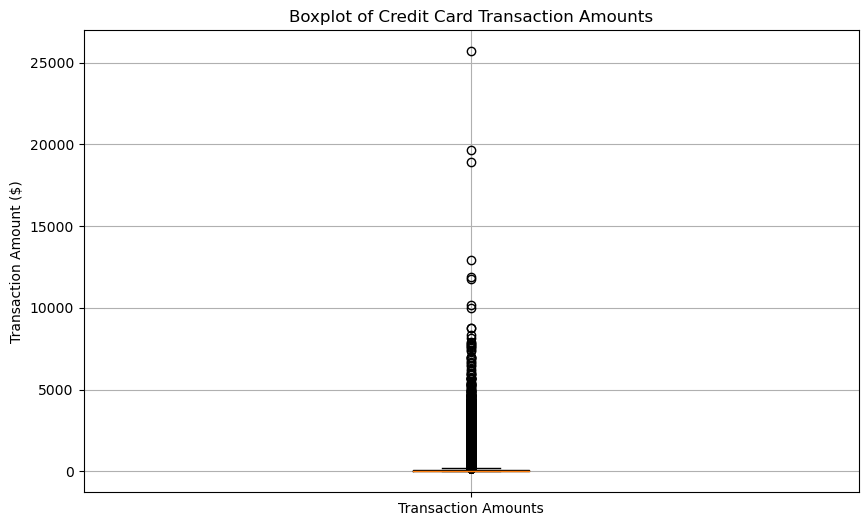

In [174]:
# Create a boxplot for the 'Amount' column in the creditcard_df DataFrame
plt.figure(figsize=(10, 6))

plt.boxplot(creditcard_df['Amount'], labels=['Transaction Amounts'])

plt.ylabel('Transaction Amount ($)')
plt.title('Boxplot of Credit Card Transaction Amounts')
plt.grid(True)
plt.show()

## Data preprocessing

In [175]:
# Extract leading digits from transaction amounts
def get_leading_digit(amount):
    if amount > 0:
        return int(str(amount).lstrip('0.')[0])
    else:
        return None

In [176]:
# Apply the function to the "Amount" column
creditcard_df['LeadingDigit'] = creditcard_df['Amount'].apply(get_leading_digit)

In [177]:
# Checking dataframe
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,LeadingDigit
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,6.0


In [178]:
# Checking for null values
creditcard_df.isna().sum()

Time               0
V1                 0
V2                 0
V3                 0
V4                 0
V5                 0
V6                 0
V7                 0
V8                 0
V9                 0
V10                0
V11                0
V12                0
V13                0
V14                0
V15                0
V16                0
V17                0
V18                0
V19                0
V20                0
V21                0
V22                0
V23                0
V24                0
V25                0
V26                0
V27                0
V28                0
Amount             0
Class              0
LeadingDigit    1825
dtype: int64

In [179]:
# Remove rows with None values in the LeadingDigit column
creditcard_df = creditcard_df.dropna(subset=['LeadingDigit'])

In [180]:
# Calculate the frequency of each leading digit
first_digit_counts = creditcard_df['LeadingDigit'].value_counts().sort_index()
print(first_digit_counts)

1.0    101507
2.0     42575
3.0     28017
4.0     23373
5.0     18667
6.0     14433
7.0     18827
8.0     17841
9.0     17742
Name: LeadingDigit, dtype: int64


In [181]:
# Benford's expected frequencies in decimal format
first_benford_frequencies = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]
first_benford_percentages = [f"{freq * 100:.1f}%" for freq in first_benford_frequencies]

print("Benford's Expected Frequencies (as percentages):")
for i, percentage in enumerate(first_benford_percentages):
    print(f"Digit {i + 1}: {percentage}")

Benford's Expected Frequencies (as percentages):
Digit 1: 30.1%
Digit 2: 17.6%
Digit 3: 12.5%
Digit 4: 9.7%
Digit 5: 7.9%
Digit 6: 6.7%
Digit 7: 5.8%
Digit 8: 5.1%
Digit 9: 4.6%


In [182]:
# Normalize the counts to get percentages
total_transactions = len(creditcard_df)
first_observed_frequencies = (first_digit_counts / total_transactions) * 100  
first_observed_frequencies = first_observed_frequencies.round(2).astype(str) + '%'

print(first_observed_frequencies)

1.0    35.87%
2.0    15.05%
3.0      9.9%
4.0     8.26%
5.0      6.6%
6.0      5.1%
7.0     6.65%
8.0      6.3%
9.0     6.27%
Name: LeadingDigit, dtype: object


In [183]:
# Creating dataframe
first_benford_frequencies = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6] 
first_observed_frequencies = [35.9, 15.1, 9.9, 8.3, 6.6, 5.1, 6.7, 6.3, 6.3] 

first_digits = [1, 2, 3, 4, 5, 6, 7, 8, 9]  

first_df = pd.DataFrame({
    "First Digit": first_digits,
    "Benford's Law for 1st Digit": first_benford_frequencies,
    "Actual Frequencies": first_observed_frequencies,
})

first_df["Deviations, %"] = (first_df["Actual Frequencies"] - 
                             first_df["Benford's Law for 1st Digit"]).round(2)

first_df["Benford's Law for 1st Digit"] = first_df["Benford's Law for 1st Digit"].astype(str) + '%'
first_df["Actual Frequencies"] = first_df["Actual Frequencies"].astype(str) + '%'
first_df["Deviations, %"] = first_df["Deviations, %"].astype(str) + '%'

print(first_df)

   First Digit Benford's Law for 1st Digit Actual Frequencies Deviations, %
0            1                       30.1%              35.9%          5.8%
1            2                       17.6%              15.1%         -2.5%
2            3                       12.5%               9.9%         -2.6%
3            4                        9.7%               8.3%         -1.4%
4            5                        7.9%               6.6%         -1.3%
5            6                        6.7%               5.1%         -1.6%
6            7                        5.8%               6.7%          0.9%
7            8                        5.1%               6.3%          1.2%
8            9                        4.6%               6.3%          1.7%


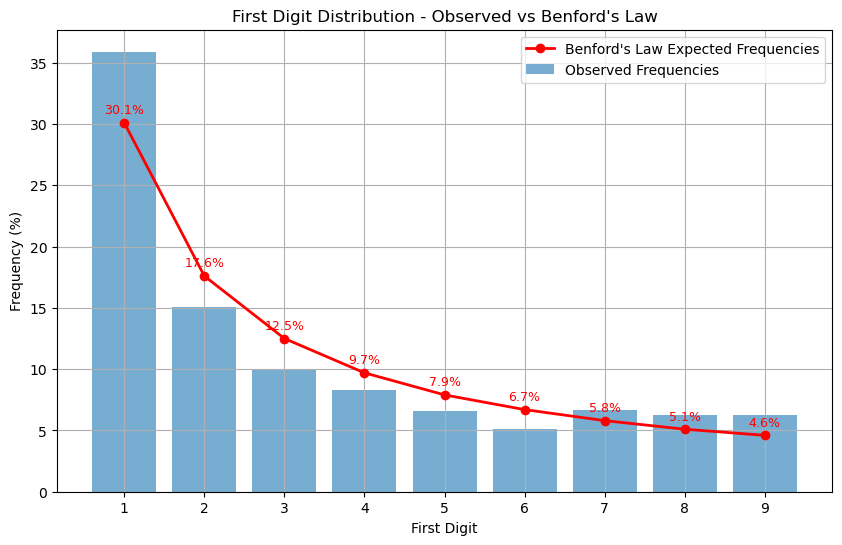

In [184]:
# Observed frequencies for the first digit (1-9)
first_observed_frequencies = pd.Series(
    [35.9, 15.1, 9.9, 8.3, 6.6, 5.1, 6.7, 6.3, 6.3], 
    index=np.arange(1, 10)  # Indexing from 1 to 9 for digits 1 to 9
)


first_benford_frequencies = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])


plt.figure(figsize=(10, 6))


plt.bar(first_observed_frequencies.index, first_observed_frequencies.values, alpha=0.6, label='Observed Frequencies')

plt.plot(first_observed_frequencies.index, first_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(first_observed_frequencies.index, first_benford_frequencies):
    plt.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('First Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(1, 10))  # Set x-ticks for digits 1-9
plt.legend()
plt.grid(True)
plt.show()


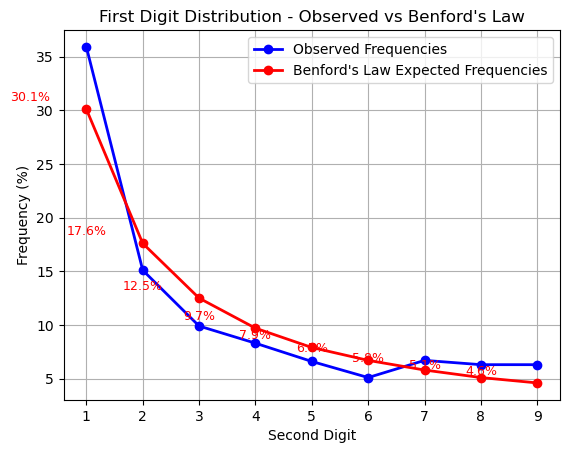

In [185]:
# Plotting line graph for observed frequencies
plt.plot(np.arange(1, 10), first_observed_frequencies, color='blue', marker='o', linestyle='-', linewidth=2, label='Observed Frequencies')

plt.plot(np.arange(1, 10), first_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")


for x, y in zip(range(10), first_benford_frequencies):
    plt.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(1, 10))  # Set x-ticks for digits 0-9
plt.legend()
plt.grid(True)
plt.show()

### Findings:
There are deviations for first digit as overuse of digit 1 about 5.8% and digits 8 and 9 about 1.2% and 1.9%. Also digits 2, 3, 4, 5 and 6 do not follow Benford's distribution.

## Statistical Tests

### Hypothesis formulation
Null Hypothesis, H0: There is no significant difference between the observed frequencies and the expected frequencies. 

Alternative Hypothesis, H1: There is a significant difference between the observed frequencies and the expected frequencies. 
Alpha is set as 0.05.

#### Chi Squared Test

In [186]:
# Applying Chi Squared Test
first_benford_frequencies = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]) 
first_observed_frequencies = np.array([35.9, 15.1, 9.9, 8.3, 6.6, 5.1, 6.7, 6.3, 6.3]) 

observed_total = np.sum(first_observed_frequencies)
expected_total = np.sum(first_benford_frequencies)

first_observed_frequencies_normalized = first_observed_frequencies / observed_total * expected_total

chi2_stat, p_value = chisquare(first_observed_frequencies_normalized, first_benford_frequencies)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

Chi-Squared Statistic: 3.85
P-Value: 0.8707


### Findings:
P-value for the Chi-Squared test is 0.8707 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### The Kolmogorov-Smirnov (K-S) test

In [187]:
# Applying the Kolmogorov-Smirnov test
first_observed_probabilities = first_observed_frequencies / first_observed_frequencies.sum()
first_benford_probabilities = first_benford_frequencies / first_benford_frequencies.sum()

observed_cdf = np.cumsum(first_observed_probabilities)
benford_cdf = np.cumsum(first_benford_probabilities)

ks_statistic, p_value = stats.ks_2samp(observed_cdf, benford_cdf)

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

Kolmogorov-Smirnov Statistic: 0.1111
P-Value: 1.0000


### Findings:
P-value for the the Kolmogorov-Smirnov (K-S) test is 1.0 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### Z-statistics

Significance level (alpha) for Z-statistics is set as 0.05 or 1.96.
That means that 95% of actual frequencies should confirm the Benford's Law.

In [188]:
# Calculating Z-statistics

first_df["Benford's Law for 1st Digit"] = first_df["Benford's Law for 1st Digit"].astype(str).str.rstrip('%').astype(float) / 100
first_df['Actual Frequencies'] = first_df['Actual Frequencies'].astype(str).str.rstrip('%').astype(float) / 100

N = 9  

first_df['Z-Statistic'] = (np.abs(first_df['Actual Frequencies'] - first_df["Benford's Law for 1st Digit"]) -
                            (1 / (2 * N)) * np.sqrt(first_df["Benford's Law for 1st Digit"] * (1 - first_df["Benford's Law for 1st Digit"]) / N))

print(first_df[['First Digit', 'Benford\'s Law for 1st Digit', 'Actual Frequencies', 'Z-Statistic']])

   First Digit  Benford's Law for 1st Digit  Actual Frequencies  Z-Statistic
0            1                        0.301               0.359     0.049506
1            2                        0.176               0.151     0.017948
2            3                        0.125               0.099     0.019876
3            4                        0.097               0.083     0.008519
4            5                        0.079               0.066     0.008005
5            6                        0.067               0.051     0.011370
6            7                        0.058               0.067     0.004671
7            8                        0.051               0.063     0.007926
8            9                        0.046               0.063     0.013121


### Findings:
All observations from the Z-statistics are less than 1.96 and are conform to Benford's Law.

## Data preprocessing

In [189]:
# Extracting second digit from transaction amounts
def get_second_digit(amount):
    amount_str = str(amount).lstrip('0.')
    amount_str = ''.join(filter(str.isdigit, amount_str))
    if len(amount_str) >= 2:
        return int(amount_str[1])  
    else:
        return None

In [190]:
# Applying the function to the "Amount" column
creditcard_df['SecondDigit'] = creditcard_df['Amount'].apply(get_second_digit)

In [191]:
# Checking dataframe
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,LeadingDigit,SecondDigit
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0,4.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2.0,6.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3.0,7.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,2.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,6.0,9.0


In [192]:
# Checking for null values
creditcard_df.isna().sum()

Time               0
V1                 0
V2                 0
V3                 0
V4                 0
V5                 0
V6                 0
V7                 0
V8                 0
V9                 0
V10                0
V11                0
V12                0
V13                0
V14                0
V15                0
V16                0
V17                0
V18                0
V19                0
V20                0
V21                0
V22                0
V23                0
V24                0
V25                0
V26                0
V27                0
V28                0
Amount             0
Class              0
LeadingDigit       0
SecondDigit     1117
dtype: int64

In [193]:
# Removing rows with None values in the SecondDigit column
creditcard_df = creditcard_df.dropna(subset=['SecondDigit'])

In [194]:
# Calculating the frequency of each second digit (0-9)
second_digit_counts = creditcard_df['SecondDigit'].value_counts().sort_index()
print(second_digit_counts)

0.0    49714
1.0    22583
2.0    25348
3.0    17695
4.0    24305
5.0    29625
6.0    20826
7.0    21713
8.0    16443
9.0    53613
Name: SecondDigit, dtype: int64


In [195]:
# Normalizing the counts to get percentages
second_total_transactions = len(creditcard_df)
second_observed_frequencies = second_digit_counts / second_total_transactions
print(second_observed_frequencies)

0.0    0.176375
1.0    0.080120
2.0    0.089930
3.0    0.062778
4.0    0.086229
5.0    0.105104
6.0    0.073886
7.0    0.077033
8.0    0.058336
9.0    0.190208
Name: SecondDigit, dtype: float64


In [196]:
# Benford's expected frequencies with percentage signs 
second_benford_frequencies = [0.120, 0.114, 0.109, 0.104, 0.100, 0.097, 0.093, 0.090, 0.088, 0.085]
second_benford_percentages = [f"{freq*100:.1f}%" for freq in second_benford_frequencies]

print("Benford's Expected Frequencies for Digits (0-9) (as percentages):")
for i, percentage in enumerate(second_benford_percentages):
    print(f"Digit {i}: {percentage}")

Benford's Expected Frequencies for Digits (0-9) (as percentages):
Digit 0: 12.0%
Digit 1: 11.4%
Digit 2: 10.9%
Digit 3: 10.4%
Digit 4: 10.0%
Digit 5: 9.7%
Digit 6: 9.3%
Digit 7: 9.0%
Digit 8: 8.8%
Digit 9: 8.5%


In [197]:
# Creating dataframe
second_benford_frequencies = [12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]  
second_observed_frequencies = [17.6, 8.0, 9.0, 6.3, 8.6, 10.5, 7.4, 7.7, 5.8, 19.0]  

second_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  

second_df = pd.DataFrame({
    "Second Digit": second_digits,
    "Benford's Law for 2nd Digit": second_benford_frequencies,
    "Actual Frequencies": second_observed_frequencies,
})


second_df["Deviations, %"] = (second_df["Actual Frequencies"] - 
                             second_df["Benford's Law for 2nd Digit"]).round(2)

second_df["Benford's Law for 2nd Digit"] = second_df["Benford's Law for 2nd Digit"].astype(str) + '%'
second_df["Actual Frequencies"] = second_df["Actual Frequencies"].astype(str) + '%'
second_df["Deviations, %"] = second_df["Deviations, %"].astype(str) + '%'

print(second_df)

   Second Digit Benford's Law for 2nd Digit Actual Frequencies Deviations, %
0             0                       12.0%              17.6%          5.6%
1             1                       11.4%               8.0%         -3.4%
2             2                       10.9%               9.0%         -1.9%
3             3                       10.4%               6.3%         -4.1%
4             4                       10.0%               8.6%         -1.4%
5             5                        9.7%              10.5%          0.8%
6             6                        9.3%               7.4%         -1.9%
7             7                        9.0%               7.7%         -1.3%
8             8                        8.8%               5.8%         -3.0%
9             9                        8.5%              19.0%         10.5%


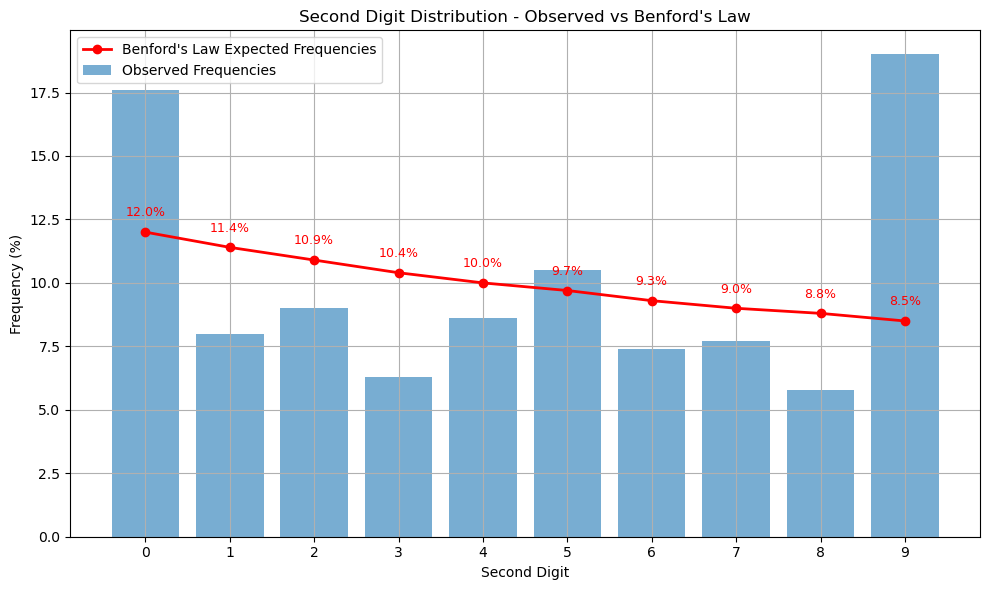

In [198]:
# Ploting bar chart
second_observed_frequencies = pd.Series(
    [17.6, 8.0, 9.0, 6.3, 8.6, 10.5, 7.4, 7.7, 5.8, 19.0], 
    index=np.arange(0, 10)  # Second digit from 0 to 9
)

second_benford_frequencies = np.array([12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5])

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(0, 10), second_observed_frequencies, alpha=0.6, label='Observed Frequencies')

ax.plot(np.arange(0, 10), second_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(range(10), second_benford_frequencies):
    ax.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

ax.set_xlabel('Second Digit')
ax.set_ylabel('Frequency (%)')
ax.set_title('Second Digit Distribution - Observed vs Benford\'s Law')
ax.set_xticks(np.arange(0, 10)) 
ax.legend()
ax.grid(True)


plt.tight_layout() 
plt.show()

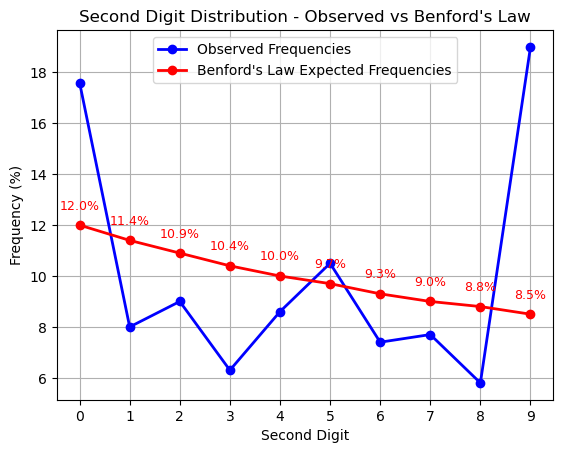

In [199]:
# Ploting line graph for observed frequencies
plt.plot(np.arange(0, 10), second_observed_frequencies, color='blue', marker='o', linestyle='-', linewidth=2, label='Observed Frequencies')
plt.plot(np.arange(0, 10), second_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(range(10), second_benford_frequencies):
    plt.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(0, 10))  
plt.legend()
plt.grid(True)
plt.show()

### Findings:
There are significant deviations for digits 0 and 9 as 5.6% and 10.5% which should be examined further. Also digits 1, 2, 3, 6 and 7 appear underused.

## Statistical Tests

### Hypothesis formulation
Null Hypothesis, H0: There is no significant difference between the observed frequencies and the expected frequencies. 

Alternative Hypothesis, H1: There is a significant difference between the observed frequencies and the expected frequencies. 

Alpha is set as 0.05.

#### Chi - Squared Test

In [200]:
# Applying the Chi-Squared test
second_benford_frequencies = np.array([12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]) 
second_observed_frequencies = np.array([17.6, 8.0, 9.0, 6.3, 8.6, 10.5, 7.4, 7.7, 5.8, 19.0]) 

second_observed_total = np.sum(second_observed_frequencies)
second_expected_total = np.sum(second_benford_frequencies)

second_observed_frequencies_normalized = second_observed_frequencies / second_observed_total * second_expected_total

chi2_stat, p_value = chisquare(second_observed_frequencies_normalized, second_benford_frequencies)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

Chi-Squared Statistic: 20.45
P-Value: 0.0153


### Findings:
P-value for the Chi-Squared test is 0.015 or p-value < 0.05 and we can reject the Null Hypothesis, that means that there is a statistically significant difference between the observed frequencies of the leading digits in your dataset and the expected frequencies according to Benford's Law.
In other words, the data unlikely adheres to Benford's Law.

#### The Kolmogorov-Smirnov (K-S) test

In [201]:
# Applying the Kolmogorov-Smirnov test
second_observed_probabilities = second_observed_frequencies / second_observed_frequencies.sum()
second_benford_probabilities = second_benford_frequencies / second_benford_frequencies.sum()

observed_cdf = np.cumsum(second_observed_probabilities)
benford_cdf = np.cumsum(second_benford_probabilities)

ks_statistic, p_value = stats.ks_2samp(observed_cdf, benford_cdf)

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

Kolmogorov-Smirnov Statistic: 0.2000
P-Value: 0.9945


### Findings:
P-value for the the Kolmogorov-Smirnov (K-S) test is 0.9945 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### Z-statistics

Significance level (alpha) for Z-statistics is set as 0.05 or 1.96.
That means that 95% of actual frequencies should confirm the Benford's Law.

In [202]:
# Calculating Z-statistics
second_df["Benford's Law for 2nd Digit"] = second_df["Benford's Law for 2nd Digit"].astype(str).str.rstrip('%').astype(float) / 100
second_df['Actual Frequencies'] = second_df['Actual Frequencies'].astype(str).str.rstrip('%').astype(float) / 100

N = 9 

second_df['Z-Statistic'] = (np.abs(second_df['Actual Frequencies'] - second_df["Benford's Law for 2nd Digit"]) -
                            (1 / (2 * N)) * np.sqrt(second_df["Benford's Law for 2nd Digit"] * (1 - second_df["Benford's Law for 2nd Digit"]) / N))

print(second_df[['Second Digit', 'Benford\'s Law for 2nd Digit', 'Actual Frequencies', 'Z-Statistic']])

   Second Digit  Benford's Law for 2nd Digit  Actual Frequencies  Z-Statistic
0             0                        0.120               0.176     0.049982
1             1                        0.114               0.080     0.028115
2             2                        0.109               0.090     0.013229
3             3                        0.104               0.063     0.035347
4             4                        0.100               0.086     0.008444
5             5                        0.097               0.105     0.002519
6             6                        0.093               0.074     0.013622
7             7                        0.090               0.077     0.007700
8             8                        0.088               0.058     0.024754
9             9                        0.085               0.190     0.099836


### Findings:
All observations from the Z-statistics are less than 1.96 and are conform to Benford's Law.

# 2. Payments transactions

In [203]:
# Downloading necessary files
filepath = 'C:/Users/user/Documents/Imir/My Data Analysis Projects/Data/PS_20174392719_1491204439457_log.csv'
payment_df = pd.read_csv(filepath)
print("There are " + str(len(creditcard_df)) + " observations in payment fraud dataset.")
print("There are " + str(len(creditcard_df.columns)) + " variables in the dataset.")
payment_df.head(5)

There are 281865 observations in payment fraud dataset.
There are 33 variables in the dataset.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [204]:
# Checking the last 5 rows of the dataset
payment_df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [205]:
# Getting summary on dataframe
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [206]:
# Checking for null values
payment_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

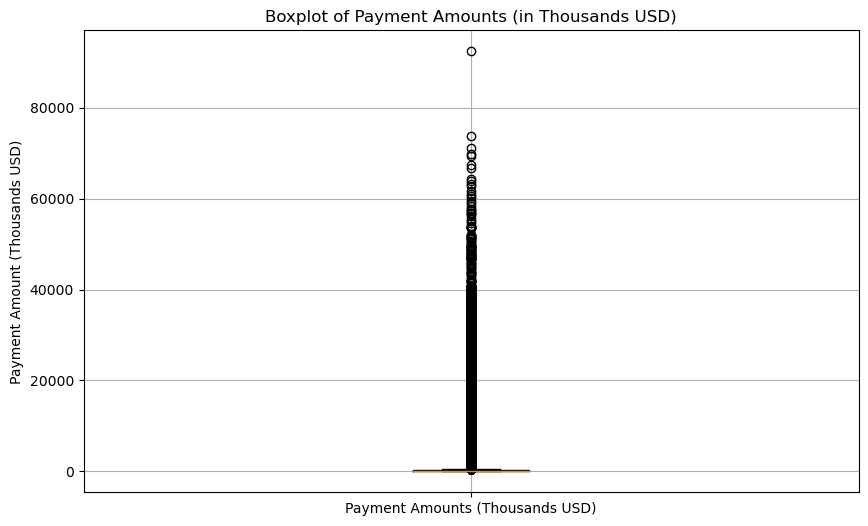

In [207]:
# Ploting box plot
payment_df['Amount_thousands'] = payment_df['amount'] / 1000
plt.figure(figsize=(10, 6))

plt.boxplot(payment_df['Amount_thousands'], labels=['Payment Amounts (Thousands USD)'])

plt.ylabel('Payment Amount (Thousands USD)')
plt.title('Boxplot of Payment Amounts (in Thousands USD)')
plt.grid(True)
plt.show()

## Data preprocessing

In [208]:
# Extracting leading digits from payments amounts
def get_leading_digit(amount):
    if amount > 0:
        return int(str(amount).lstrip('0.')[0])
    else:
        return None

In [209]:
# Applying the function to the "Amount" column
payment_df['LeadingDigit'] = payment_df['amount'].apply(get_leading_digit)

In [210]:
# Checking dataframe
payment_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Amount_thousands,LeadingDigit
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.83964,9.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1.86428,1.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.18100,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.18100,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11.66814,1.0


In [211]:
# Checking for null values
payment_df.isna().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
Amount_thousands     0
LeadingDigit        16
dtype: int64

In [212]:
# Removing rows with None values in the LeadingDigit column
payment_df = payment_df.dropna(subset=['LeadingDigit'])

In [213]:
# Calculating the frequency of each leading digit
first_digit_counts = payment_df['LeadingDigit'].value_counts().sort_index()
print(first_digit_counts)

1.0    2137530
2.0    1302158
3.0     798424
4.0     526698
5.0     395757
6.0     334294
7.0     305926
8.0     287559
9.0     274258
Name: LeadingDigit, dtype: int64


In [214]:
# Actual frequencies with percentage sign
total_payments = len(payment_df)
first_observed_frequencies = (first_digit_counts / total_payments) * 100  

first_observed_frequencies = first_observed_frequencies.round(2).astype(str) + '%'

print(first_observed_frequencies)

1.0     33.6%
2.0    20.47%
3.0    12.55%
4.0     8.28%
5.0     6.22%
6.0     5.25%
7.0     4.81%
8.0     4.52%
9.0     4.31%
Name: LeadingDigit, dtype: object


In [215]:
# Creating dataframe
first_benford_frequencies = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6] 
first_observed_frequencies = [33.6, 20.5, 12.6, 8.3, 6.2, 5.3, 4.8, 4.5, 4.3] 

first_digits = [1, 2, 3, 4, 5, 6, 7, 8, 9] 

first_payment_df = pd.DataFrame({
    "First Digit": first_digits,
    "Benford's Law for 1st Digit": first_benford_frequencies,
    "Actual Frequencies": first_observed_frequencies,
})

first_payment_df["Deviations, %"] = (first_payment_df["Actual Frequencies"] - 
                             first_payment_df["Benford's Law for 1st Digit"]).round(2)

first_payment_df["Benford's Law for 1st Digit"] = first_payment_df["Benford's Law for 1st Digit"].astype(str) + '%'
first_payment_df["Actual Frequencies"] = first_payment_df["Actual Frequencies"].astype(str) + '%'
first_payment_df["Deviations, %"] = first_payment_df["Deviations, %"].astype(str) + '%'

print(first_payment_df)

   First Digit Benford's Law for 1st Digit Actual Frequencies Deviations, %
0            1                       30.1%              33.6%          3.5%
1            2                       17.6%              20.5%          2.9%
2            3                       12.5%              12.6%          0.1%
3            4                        9.7%               8.3%         -1.4%
4            5                        7.9%               6.2%         -1.7%
5            6                        6.7%               5.3%         -1.4%
6            7                        5.8%               4.8%         -1.0%
7            8                        5.1%               4.5%         -0.6%
8            9                        4.6%               4.3%         -0.3%


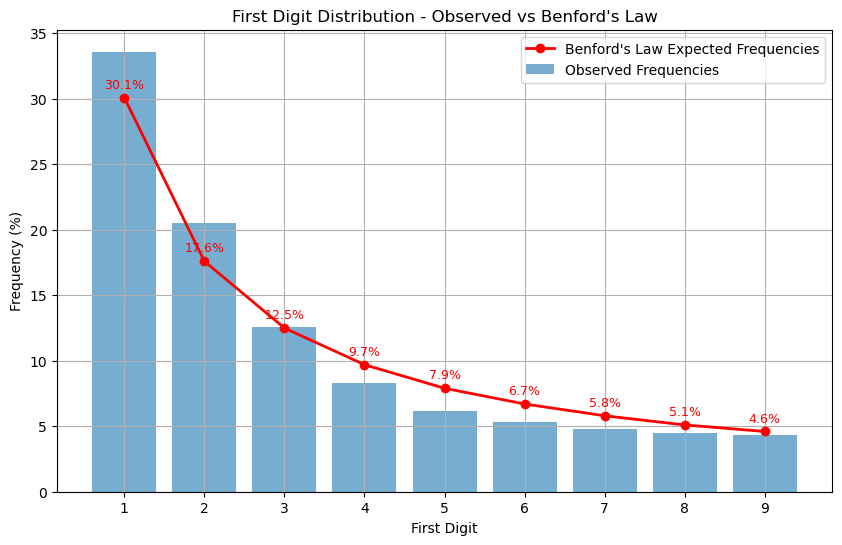

In [216]:
# Ploting bar chart 
first_observed_frequencies = pd.Series(
    [33.6, 20.5, 12.6, 8.3, 6.2, 5.3, 4.8, 4.5, 4.3], 
    index=np.arange(1, 10)  
)

first_benford_frequencies = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])

plt.figure(figsize=(10, 6))

plt.bar(first_observed_frequencies.index, first_observed_frequencies.values, alpha=0.6, label='Observed Frequencies')

plt.plot(first_observed_frequencies.index, first_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(first_observed_frequencies.index, first_benford_frequencies):
    plt.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('First Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(1, 10))
plt.legend()
plt.grid(True)
plt.show()

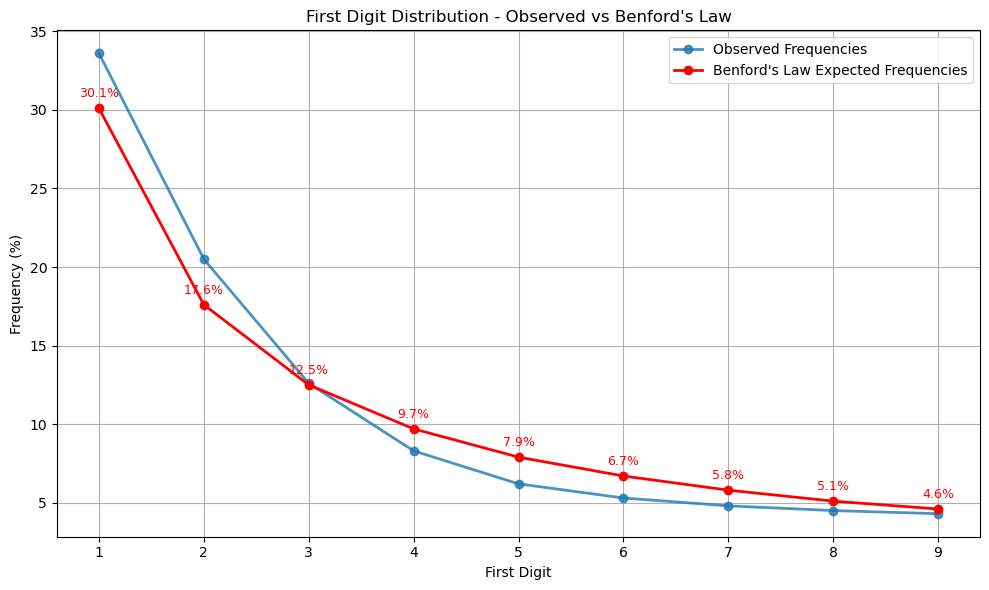

In [217]:
# Ploting line graph
plt.figure(figsize=(10, 6))

plt.plot(first_observed_frequencies.index, first_observed_frequencies.values, marker='o', linestyle='-', linewidth=2, label='Observed Frequencies', alpha=0.8)

plt.plot(first_observed_frequencies.index, first_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(first_observed_frequencies.index, first_benford_frequencies):
    plt.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('First Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(1, 10))
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()

### Findings:
There are deiviations for digit 1 and 2 as overuse of these digits.

## Statistical Tests

### Hypothesis formulation
Null Hypothesis, H0: There is no significant difference between the observed frequencies and the expected frequencies. 

Alternative Hypothesis, H1: There is a significant difference between the observed frequencies and the expected frequencies. 

Alpha is set as 0.05.

#### Chi Squared Test

In [218]:
# Applying the Chi-Squared test
payment_benford_frequencies = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]) 
payment_observed_frequencies = np.array([33.6, 20.5, 12.6, 8.3, 6.2, 5.3, 4.8, 4.5, 4.3]) 

observed_total = np.sum(payment_observed_frequencies)
expected_total = np.sum(payment_benford_frequencies)

payment_observed_frequencies_normalized = payment_observed_frequencies / observed_total * expected_total

chi2_stat, p_value = chisquare(payment_observed_frequencies_normalized, payment_benford_frequencies)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

Chi-Squared Statistic: 2.00
P-Value: 0.9809


### Findings:
P-value for the Chi-Squared test is 0.9809 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### The Kolmogorov-Smirnov (K-S) test

In [219]:
# Applying the Kolmogorov-Smirnov test
payment_observed_prob = payment_observed_frequencies / payment_observed_frequencies.sum()
payment_benford_prob = payment_benford_frequencies / payment_benford_frequencies.sum()

payment_observed_cdf = np.cumsum(payment_observed_prob)
payment_benford_cdf = np.cumsum(payment_benford_prob)

ks_statistic, p_value = stats.ks_2samp(payment_observed_cdf, payment_benford_cdf)

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

Kolmogorov-Smirnov Statistic: 0.1111
P-Value: 1.0000


### Findings:
P-value for the the Kolmogorov-Smirnov (K-S) test is 1.00 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### Z-statistics

Significance level (alpha) for Z-statistics is set as 0.05 or 1.96.
That means that 95% of actual frequencies should confirm the Benford's Law.

In [220]:
# Calculating Z-statistics
first_payment_df["Benford's Law for 1st Digit"] = first_payment_df["Benford's Law for 1st Digit"].astype(str).str.rstrip('%').astype(float) / 100
first_payment_df['Actual Frequencies'] = first_payment_df['Actual Frequencies'].astype(str).str.rstrip('%').astype(float) / 100

N = 9

first_payment_df['Z-Statistic'] = (np.abs(first_payment_df['Actual Frequencies'] - first_payment_df["Benford's Law for 1st Digit"]) -
                            (1 / (2 * N)) * np.sqrt(first_payment_df["Benford's Law for 1st Digit"] * (1 - first_payment_df["Benford's Law for 1st Digit"]) / N))

print(first_payment_df[['First Digit', 'Benford\'s Law for 1st Digit', 'Actual Frequencies', 'Z-Statistic']])

   First Digit  Benford's Law for 1st Digit  Actual Frequencies  Z-Statistic
0            1                        0.301               0.336     0.026506
1            2                        0.176               0.205     0.021948
2            3                        0.125               0.126    -0.005124
3            4                        0.097               0.083     0.008519
4            5                        0.079               0.062     0.012005
5            6                        0.067               0.053     0.009370
6            7                        0.058               0.048     0.005671
7            8                        0.051               0.045     0.001926
8            9                        0.046               0.043    -0.000879


### Findings:
All observations from the Z-statistics are less than 1.96 and are conform to Benford's Law.

## Data preprocessing

In [221]:
# Extracting second digit from transaction amounts
def get_second_digit(amount):
    # Ensure the amount is positive and has at least two digits after removing leading zeros and decimal points
    amount_str = str(amount).lstrip('0.')
    # Remove any remaining non-digit characters
    amount_str = ''.join(filter(str.isdigit, amount_str))
    if len(amount_str) >= 2:
        return int(amount_str[1])  # Return the second digit
    else:
        return None

In [222]:
# Creating copy of dataframe
payment_df = payment_df.copy() 
payment_df['SecondDigit'] = payment_df['amount'].apply(get_second_digit)

In [223]:
# Checking dataframe
payment_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Amount_thousands,LeadingDigit,SecondDigit
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.83964,9.0,8.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1.86428,1.0,8.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.18100,1.0,8.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.18100,1.0,8.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11.66814,1.0,1.0


In [224]:
# Checking for null values
payment_df.isna().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
Amount_thousands     0
LeadingDigit         0
SecondDigit         23
dtype: int64

In [225]:
# Removing rows with None values in the SecondDigit column
payment_df = payment_df.dropna(subset=['SecondDigit'])

In [226]:
# Calculating the frequency of each second digit (0-9)
second_digit_counts = payment_df['SecondDigit'].value_counts().sort_index()
print(second_digit_counts)

0.0    755137
1.0    720523
2.0    694584
3.0    667655
4.0    644343
5.0    619539
6.0    595975
7.0    576296
8.0    554099
9.0    534430
Name: SecondDigit, dtype: int64


In [227]:
# Normalizing the counts to get percentages
second_total_transactions = len(payment_df)
second_observed_frequencies = second_digit_counts / second_total_transactions
print(second_observed_frequencies)

0.0    0.118684
1.0    0.113244
2.0    0.109167
3.0    0.104935
4.0    0.101271
5.0    0.097372
6.0    0.093669
7.0    0.090576
8.0    0.087087
9.0    0.083996
Name: SecondDigit, dtype: float64


In [228]:
# Creating dataframe
second_benford_frequencies = [12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]  
second_observed_frequencies = [11.9, 11.3, 10.9, 10.5, 10.1, 9.7, 9.4, 9.1, 8.7, 8.4]  

second_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  

second_payment_df = pd.DataFrame({
    "Second Digit": second_digits,
    "Benford's Law for 2nd Digit": second_benford_frequencies,
    "Actual Frequencies": second_observed_frequencies,
})

second_payment_df["Deviations, %"] = (second_payment_df["Actual Frequencies"] - 
                             second_payment_df["Benford's Law for 2nd Digit"]).round(2)

second_payment_df["Benford's Law for 2nd Digit"] = second_payment_df["Benford's Law for 2nd Digit"].astype(str) + '%'
second_payment_df["Actual Frequencies"] = second_payment_df["Actual Frequencies"].astype(str) + '%'
second_payment_df["Deviations, %"] = second_payment_df["Deviations, %"].astype(str) + '%'

print(second_payment_df)

   Second Digit Benford's Law for 2nd Digit Actual Frequencies Deviations, %
0             0                       12.0%              11.9%         -0.1%
1             1                       11.4%              11.3%         -0.1%
2             2                       10.9%              10.9%          0.0%
3             3                       10.4%              10.5%          0.1%
4             4                       10.0%              10.1%          0.1%
5             5                        9.7%               9.7%          0.0%
6             6                        9.3%               9.4%          0.1%
7             7                        9.0%               9.1%          0.1%
8             8                        8.8%               8.7%         -0.1%
9             9                        8.5%               8.4%         -0.1%


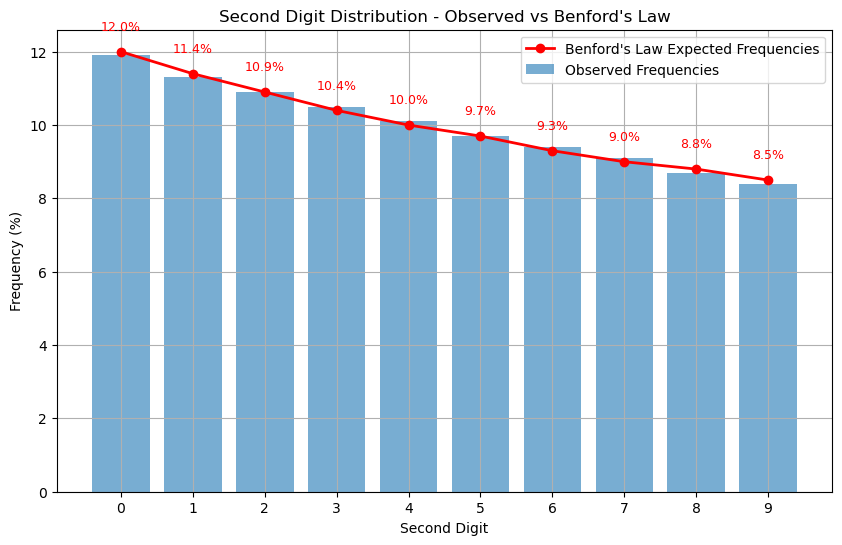

In [229]:
# Ploting bar chart
second_observed_frequencies = pd.Series(
    [11.9, 11.3, 10.9, 10.5, 10.1, 9.7, 9.4, 9.1, 8.7, 8.4], 
    index=np.arange(0, 10) 
)

second_benford_frequencies = np.array([12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5])

plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 10), second_observed_frequencies, alpha=0.6, label='Observed Frequencies')

plt.plot(np.arange(0, 10), second_benford_frequencies, color='red', marker='o', linestyle='-', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(range(10), second_benford_frequencies):
    plt.text(x, y + 0.5, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(0, 10)) 
plt.legend()
plt.grid(True)
plt.show()

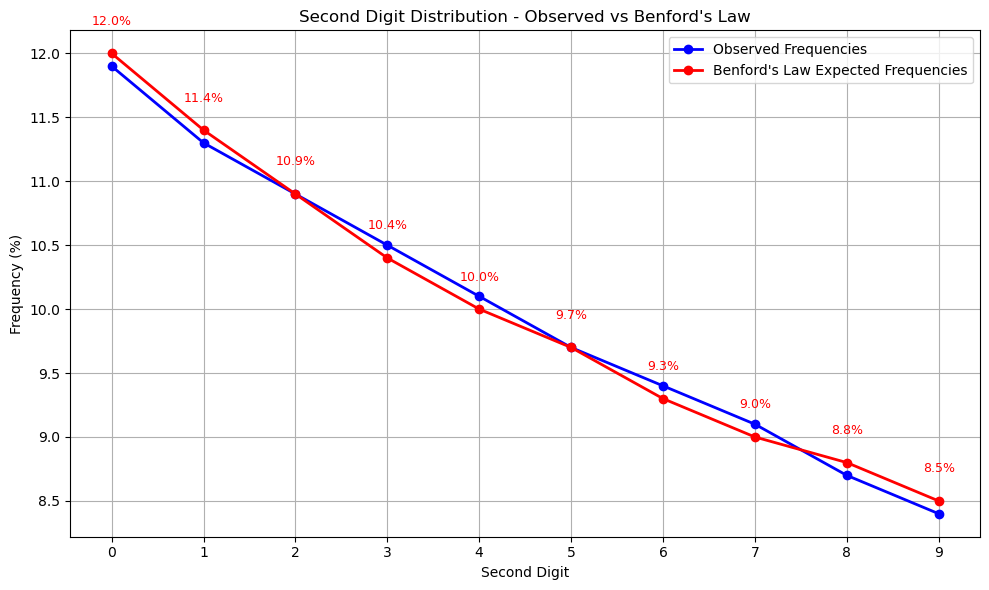

In [230]:
# Ploting line graph
plt.figure(figsize=(10, 6))

plt.plot(second_observed_frequencies.index, second_observed_frequencies.values, 
         marker='o', linestyle='-', color='blue', linewidth=2, label='Observed Frequencies')

plt.plot(second_observed_frequencies.index, second_benford_frequencies, 
         marker='o', linestyle='-', color='red', linewidth=2, label="Benford's Law Expected Frequencies")

for x, y in zip(range(10), second_benford_frequencies):
    plt.text(x, y + 0.2, f'{y:.1f}%', fontsize=9, ha='center', va='bottom', color='red')

plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution - Observed vs Benford\'s Law')
plt.xticks(np.arange(0, 10))  
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()

### Findings:
There are no any significant deviations for second digits of this dataset.

## Statistical Tests

### Hypothesis formulation
Null Hypothesis, H0: There is no significant difference between the observed frequencies and the expected frequencies. 

Alternative Hypothesis, H1: There is a significant difference between the observed frequencies and the expected frequencies. 

Alpha is set as 0.05.

#### Chi Squared Test

In [231]:
# Applying the Chi-Squared test
payment_benford_frequencies = np.array([12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]) 
payment_observed_frequencies = np.array([11.9, 11.3, 10.9, 10.5, 10.1, 9.7, 9.4, 9.1, 8.7, 8.4]) 

observed_total = np.sum(payment_observed_frequencies)
expected_total = np.sum(payment_benford_frequencies)

payment_observed_frequencies_normalized = payment_observed_frequencies / observed_total * expected_total

chi2_stat, p_value = chisquare(payment_observed_frequencies_normalized, payment_benford_frequencies)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

Chi-Squared Statistic: 0.01
P-Value: 1.0000


### Findings:
P-value for the Chi-Squared test is 1.00 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### The Kolmogorov-Smirnov (K-S) test

In [232]:
# Applying the Kolmogorov-Smirnov test
payment_observed_prob = payment_observed_frequencies / payment_observed_frequencies.sum()
payment_benford_prob = payment_benford_frequencies / payment_benford_frequencies.sum()

payment_observed_cdf = np.cumsum(payment_observed_prob)
payment_benford_cdf = np.cumsum(payment_benford_prob)

ks_statistic, p_value = stats.ks_2samp(payment_observed_cdf, payment_benford_cdf)

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

Kolmogorov-Smirnov Statistic: 0.1000
P-Value: 1.0000


### Findings:
P-value for the the Kolmogorov-Smirnov (K-S) test is 1.00 or p-value > 0.05 and we failed to reject the Null Hypothesis, that means that there is no significant evidence to suggest that the observed distribution of first digits differs from what is expected under Benford's Law. 
In other words, the data likely adheres to Benford's Law.

#### Z-statistics

Significance level (alpha) for Z-statistics is set as 0.05 or 1.96.
That means that 95% of actual frequencies should confirm the Benford's Law.

In [233]:
# Calculating Z-statistics
second_payment_df["Benford's Law for 2nd Digit"] = second_payment_df["Benford's Law for 2nd Digit"].astype(str).str.rstrip('%').astype(float) / 100
second_payment_df['Actual Frequencies'] = second_payment_df['Actual Frequencies'].astype(str).str.rstrip('%').astype(float) / 100

N = 9 

second_payment_df['Z-Statistic'] = (np.abs(second_payment_df['Actual Frequencies'] - second_payment_df["Benford's Law for 2nd Digit"]) -
                            (1 / (2 * N)) * np.sqrt(second_payment_df["Benford's Law for 2nd Digit"] * (1 - second_payment_df["Benford's Law for 2nd Digit"]) / N))

print(second_payment_df[['Second Digit', 'Benford\'s Law for 2nd Digit', 'Actual Frequencies', 'Z-Statistic']])

   Second Digit  Benford's Law for 2nd Digit  Actual Frequencies  Z-Statistic
0             0                        0.120               0.119    -0.005018
1             1                        0.114               0.113    -0.004885
2             2                        0.109               0.109    -0.005771
3             3                        0.104               0.105    -0.004653
4             4                        0.100               0.101    -0.004556
5             5                        0.097               0.097    -0.005481
6             6                        0.093               0.094    -0.004378
7             7                        0.090               0.091    -0.004300
8             8                        0.088               0.087    -0.004246
9             9                        0.085               0.084    -0.004164


### Findings:
All observations from the Z-statistics are less than 1.96 and are conform to Benford's Law.

## Conclusion:

2 datasets with identified and labeled fraud transactions were analyzed by applying Benford's Law to the first and second digits of transactions/payments amounts. These tests for first and second digits are used to assess overal conformity and detect obvious anomalies. Despite identified differences between expected distributions of numbers as per Benford's Law and actual distributions of numbers from transactions/payments amounts, the statistical tests like Chi-Squared test and the Kolmogorov-Smirnov (K-S) test shown that there is no significant evidences to suggest that the observed distribution differs from what is expected under Benford's Law as p-values of the test were above alpha (0.05) and we failed to reject the Null Hypothesis.
Also calculations of Z-statistics for both datasets do not revealed statistical significant differences in both distributions and confirmed conformity with Benford's Lawn(Z-statistics less than 1.96 (alpha = 0.05).

Deviations of actual distributions from the expected distributions as per Bernford's Law show anomalies in data distributions, which can be examined, but do not mean that there is evidence for fraud transactions/payments. On the other hand following Bernford's Law is not an evidence for absence of fraud transactions/payments.